## Portfolio Return History

C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


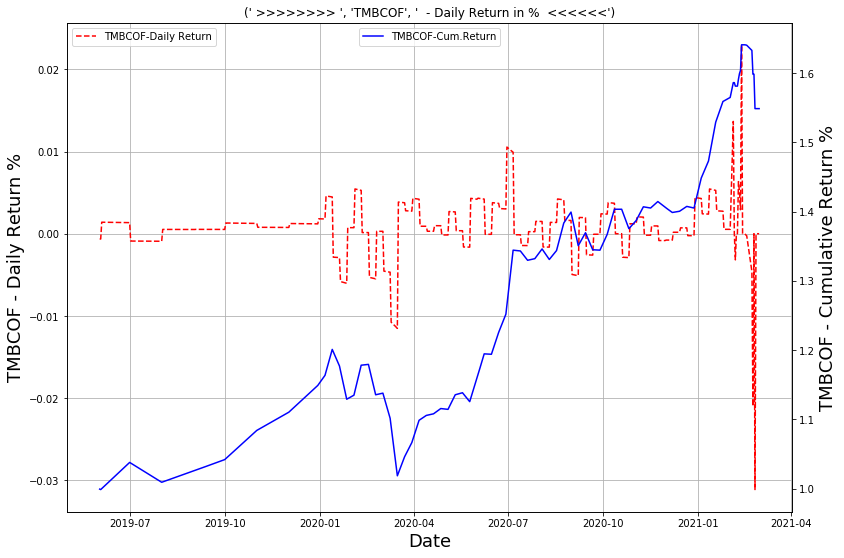

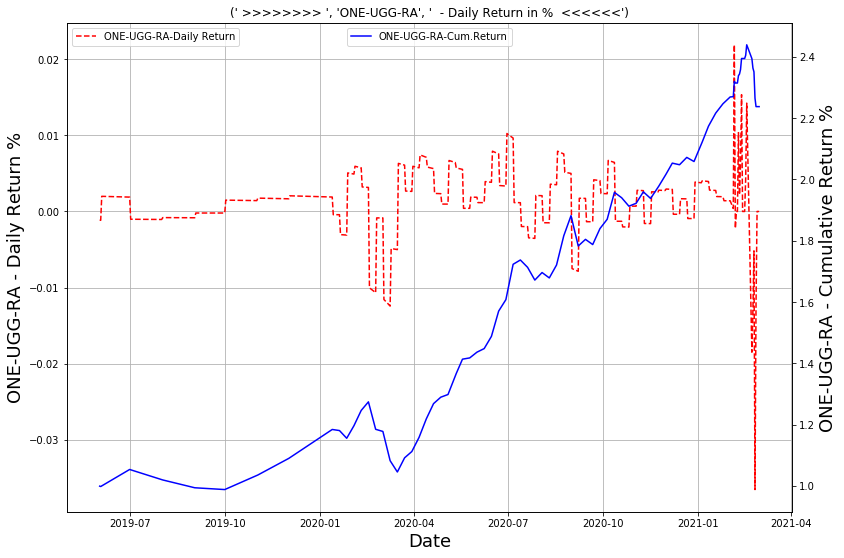

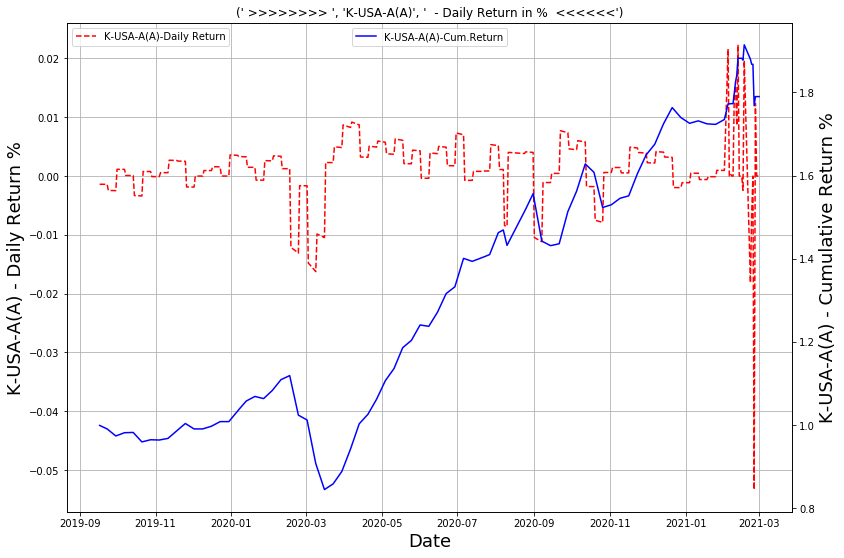

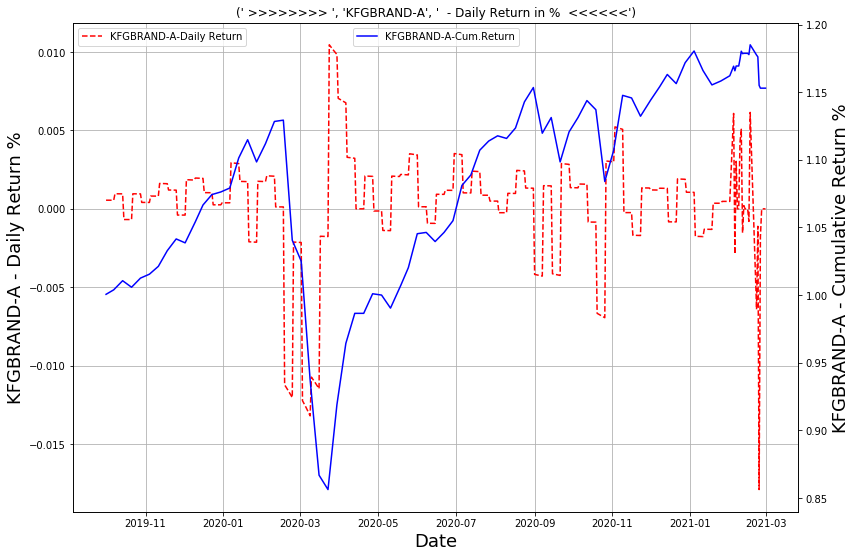

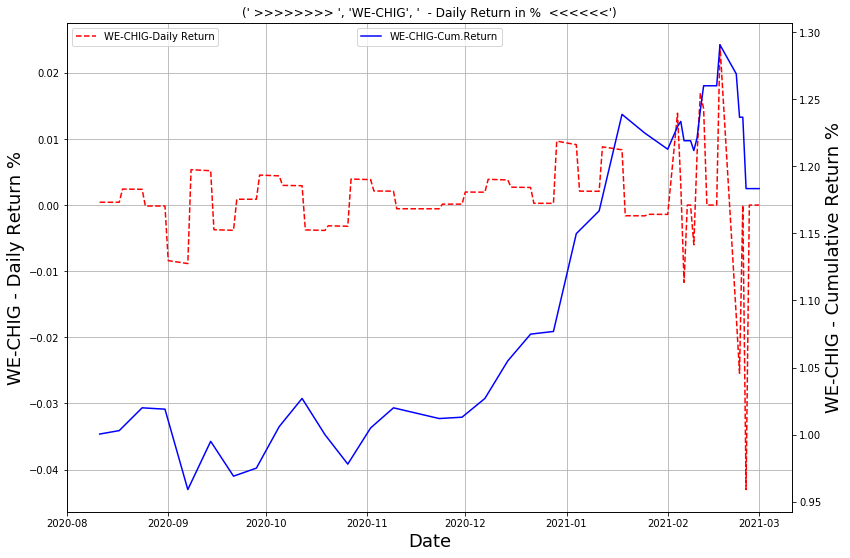

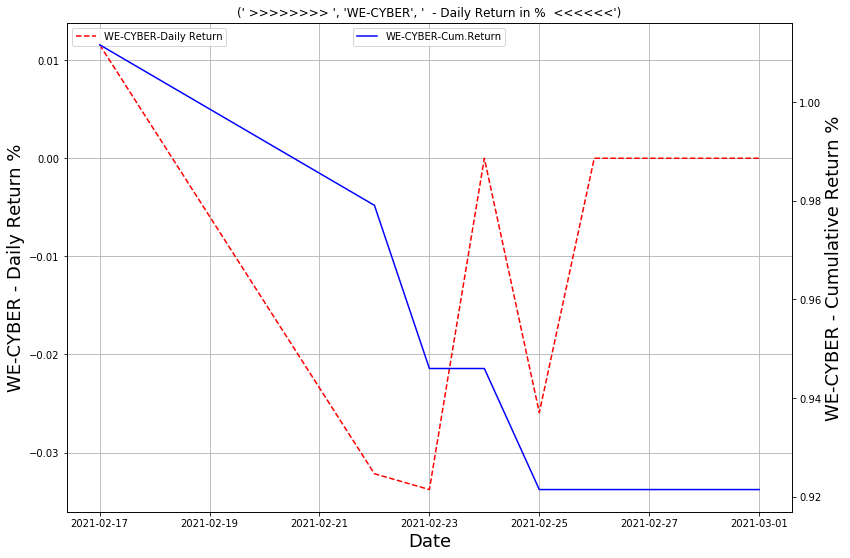

In [1]:
### Referenced Article: Portfolio Analysis Basics : Returns and Drawdowns
### Ref: https://medium.com/the-innovation/portfolio-analysis-basics-returns-and-drawdowns-70c5f7a0eb3d

# Import initial libraries
from ScrapingData.Operations_3 import *
from Scraping_Fund_Parameter import *
import warnings

import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Leveraged from the helpful Datacamp Python Finance trading blog post.
#from pandas_datareader import data as pdr
#import yfinance as yf

%matplotlib inline

# Imports in order to be able to use Plotly offline.
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print(__version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)
# Import the Sample worksheet with acquisition dates and initial cost basis:


warnings.filterwarnings("ignore")

## Uncomment to control decimal digits in the dataframe
pd.options.display.float_format = '{:.4f}'.format

def daily_returns(prices):
    res = (prices/prices.shift(1) - 1.0)[1:]
    res.columns = ['PCT']
    return res

def cumulative_returns(returns):
    res = (returns + 1.0).cumprod()
    res.columns = ['cumulative return']
    return res

##### This variable is used for YTD performance.
last_year = datetime.datetime.now() - relativedelta(years=1)
# Create string of month name and year...
text = format(last_year, '%Y')
end_of_last_year = datetime.datetime(int(text), 12, 31)


### Read data from Google Sheet
readSheet=ReadSheet()
sheetFList=readSheet.Authorization_Fund()

fundDict=dict(zip(fundList, fundCost))
fundOriginDateDict=dict(zip(fundList,fundOriginDate))
fundOriginVolumeDict=dict(zip(fundList, fundOrigin))
#print(' funddate : ',fundOriginDateDict)

dfList=[]
for n in sheetFList:
    dfIn=readSheet.LoadSheet(n)
    dfList.append(dfIn)
    
fundDfDict=dict(zip(fundList,dfList))
ddList=[]
for n in fundList:
    acquiredDate=datetime.datetime.strptime(fundOriginDateDict[n], '%Y-%m-%d')
    dummyDf=fundDfDict[n]
    dummy=dummyDf[(dummyDf['Date']>=acquiredDate)]
    ddList.append(dummy[['Date','Price']].reset_index(drop=True))

for fundName, n in zip(fundList,ddList):    
    title=' >>>>>>>> ', fundName, '  - Daily Return in %  <<<<<<'
    dummy=n.set_index(['Date'])
    dummy['PCT']=dummy['Price'].pct_change()
    dret = daily_returns(n.set_index(['Date']))
    cret = cumulative_returns(dret)
    fig, axs=plt.subplots(figsize=(13,9))
    ax2=axs.twinx()
    axs.plot(dummy['PCT'], label=fundName+'-Daily Return', color='red',linestyle='--', alpha=2)
    ax2.plot(cret['cumulative return'], label=fundName+'-Cum.Return', color='blue', alpha=2)
    plt.xticks(rotation=45)
    axs.set_title(title)
    axs.set_xlabel('Date', fontsize=18)
    axs.set_ylabel(fundName+' - Daily Return %', fontsize=18)
    ax2.set_ylabel(fundName+' - Cumulative Return %', fontsize=18)
    axs.legend(loc='upper left')
    ax2.legend(loc='upper center')
    axs.grid()
    plt.show()                     

#del sheetFList, ddList, dfList, fundDfDict
